In [6]:
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Determine the exact moment of movement onset and offset

In [51]:
with open('../python/methods.py', 'r') as file:
    exec(file.read())

In [55]:
data = read_pickle('../output/spontaneous-movement/W3/C10/emg/filter.pkl')
# events = read_pickle('../output/spontaneous-movement/W1/C2/emg/movement_events.pkl')

events = pd.read_csv('../output/spontaneous-movement-2/W3/C10/events2.csv')

In [56]:
events

,MovementID,Channel,Start,End,Amplitude,StartAmplitude,Length,EventStart,EventEnd
0,X1,2019_12_18t3I0_0,2.38765,3.16100,1.697695,1.817918,0.77335,47753,63220
1,X2,2019_12_18t3I0_1,0.53205,1.14515,2.075856,1.020634,0.61310,10641,22903
2,X3,2019_12_18t3I0_1,3.35585,3.93675,1.401007,1.497389,0.58090,67117,78735
3,X4,2019_12_18t3I0_1,4.08495,4.99715,2.131900,1.300589,0.91220,81699,99943
4,X5,2019_12_18t3I0_2,2.17135,2.83280,2.452266,1.488319,0.66145,43427,56656
5,X6,2019_12_18t3I0_2,4.70380,5.36230,2.504946,1.923695,0.65850,94076,107246
6,X7,2019_12_18t3I0_3,5.69035,6.36280,1.730360,1.580384,0.67245,113807,127256
7,X8,2019_12_18t3I0_4,6.06080,6.58400,1.719537,0.822158,0.52320,121216,131680
8,X9,2019_12_18t3I0_5,0.20385,0.91115,2.326542,0.521906,0.70730,4077,18223
9,X10,2019_12_18t3I0_5,7.94430,8.76355,2.812671,0.906047,0.81925,158886,175271


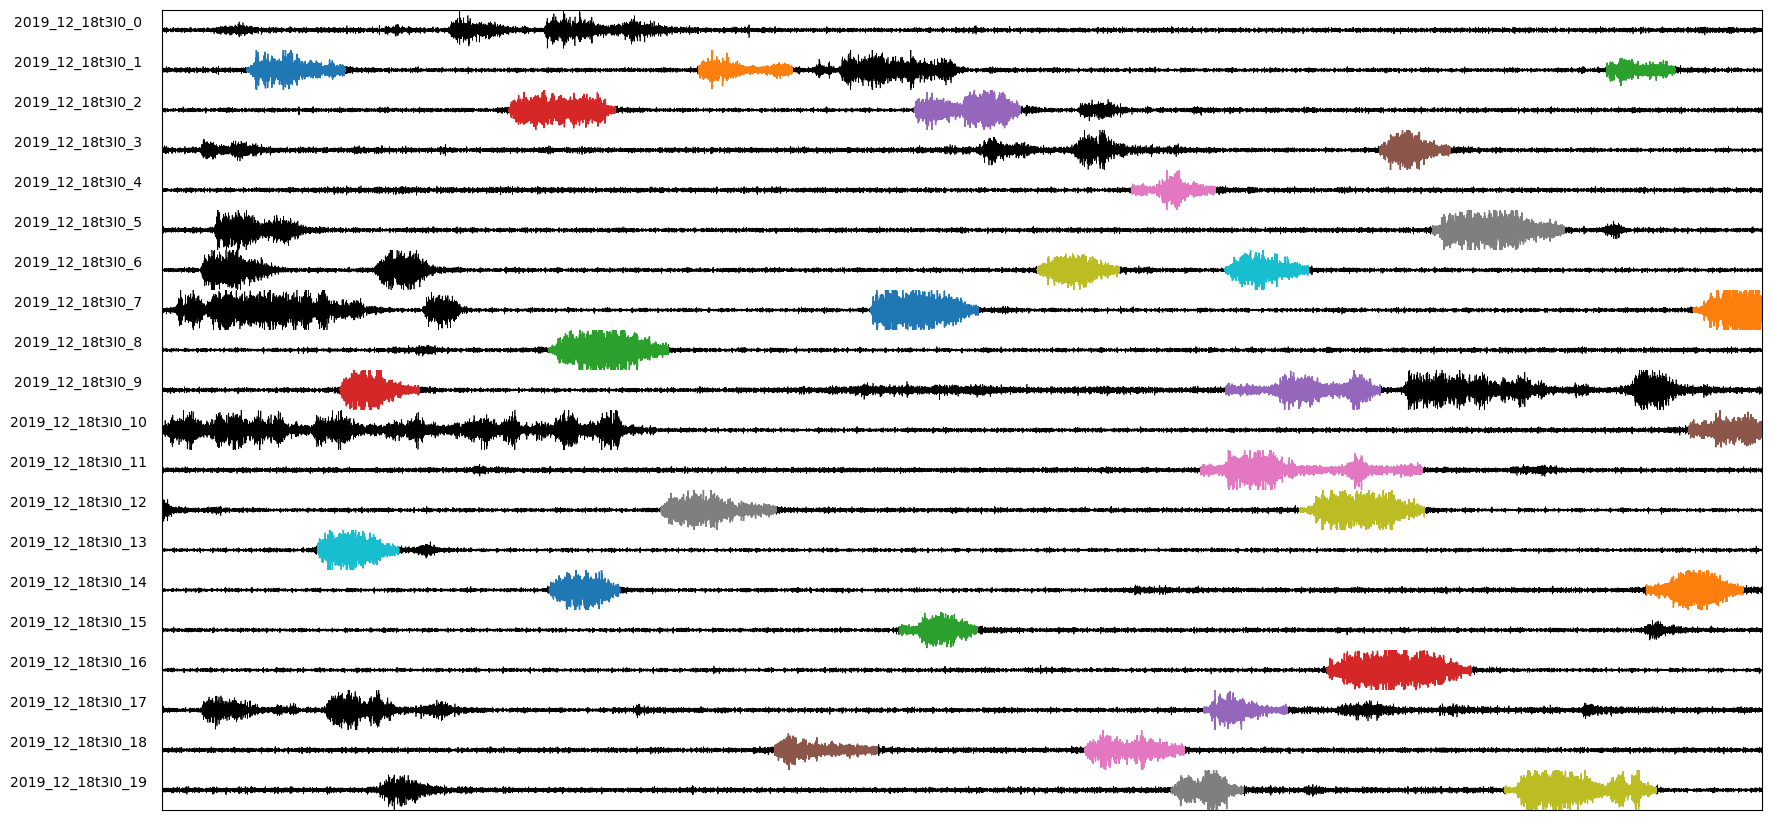

In [79]:
events = pd.read_csv('../output/spontaneous-movement-2/W3/C10/events2.csv')
figure, axes = plt.subplots(nrows = len(data.ch_names), figsize = (20, 0.5 * len(data.ch_names)))
plt.subplots_adjust(
    left = 0.1,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0,
    hspace = 0
)

x = data.times

color_list = list(mcolors.TABLEAU_COLORS.keys())

for i, channel in enumerate(data.ch_names):
    move_events = events[events['Channel'] == channel]

    y = data.get_data(picks = [i])[0]

    axes[i].plot(x, y, linewidth = 0.5, color = 'black')
    axes[i].set_ylim(-10, 10)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])
    axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')
    axes[i].set_xlim(0, 10)

    for index, row in move_events.iterrows():
        start = int(row['EventStart'])
        end = int(row['EventEnd'])
        color = color_list[index % len(color_list)]

        axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = color)

    if i != 0:
        axes[i].spines['top'].set_visible(False)

    if i != len(data.ch_names) - 1:
        axes[i].spines['bottom'].set_visible(False)

plt.show()

# Let's determine the exact movement onset and offset

First, let's select a single event with clearly overestimated onset and offset times.

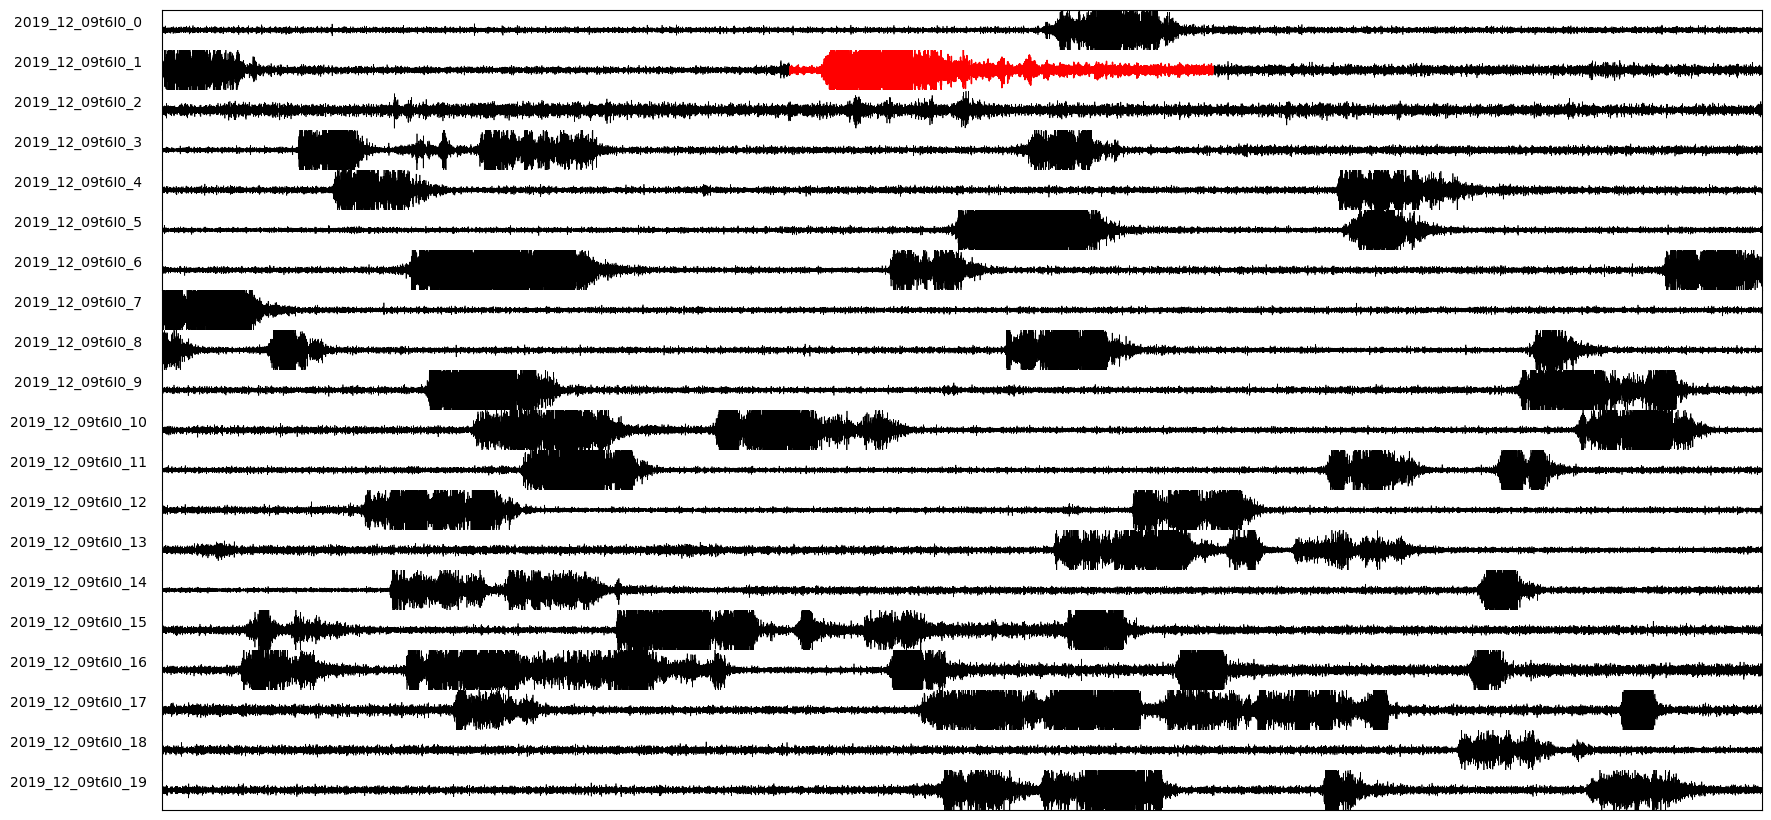

In [11]:
eventId = events[events['Channel'] == data.ch_names[1]].iloc[0]['EventId']

figure, axes = plt.subplots(nrows = len(data.ch_names), figsize = (20, 0.5 * len(data.ch_names)))
plt.subplots_adjust(
    left = 0.1,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0,
    hspace = 0
)

x = data.times

for i, channel in enumerate(data.ch_names):
    move_events = events[events['Channel'] == channel]

    y = data.get_data(picks = [i])[0]

    axes[i].plot(x, y, linewidth = 0.5, color = 'black')
    axes[i].set_ylim(-4, 4)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])
    axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')
    axes[i].set_xlim(0, 10)

    for index, row in move_events.iterrows():
        if row['EventId'] != eventId: continue
        start = int(row['EventStart'])
        end = int(row['EventEnd'])
        axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = 'red')

    if i != 0:
        axes[i].spines['top'].set_visible(False)

    if i != len(data.ch_names) - 1:
        axes[i].spines['bottom'].set_visible(False)

plt.show()

Good, this is our event.

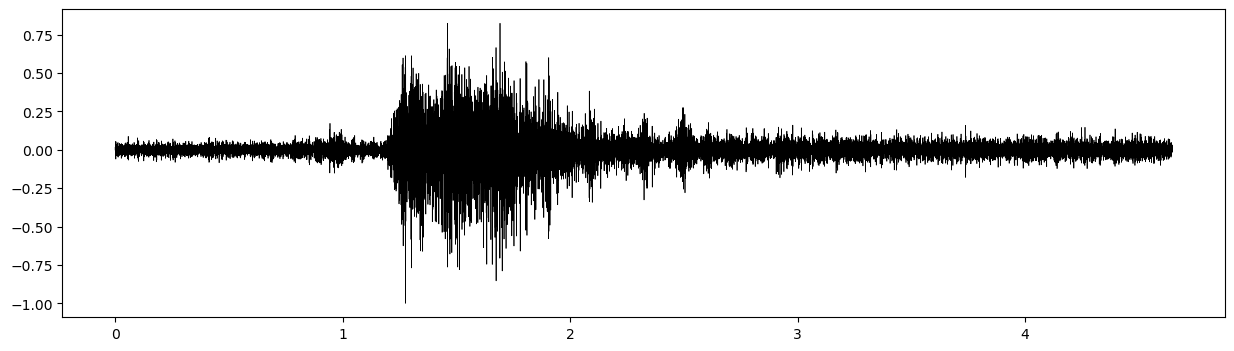

In [12]:
event = events[events['EventId'] == eventId].iloc[0]
channel = event['Channel']
start = event['Start'] - 1
end = event['End'] + 1

event_data = data.copy().pick(picks = [channel]).crop(tmin = start, tmax = end)
y = event_data.get_data()[0]
x = event_data.times

plt.figure(figsize = (15, 4))
plt.plot(x, y / np.max(np.abs(y)), linewidth = 0.5, color = 'black')
plt.show()

Let's try to determine exact onset point.

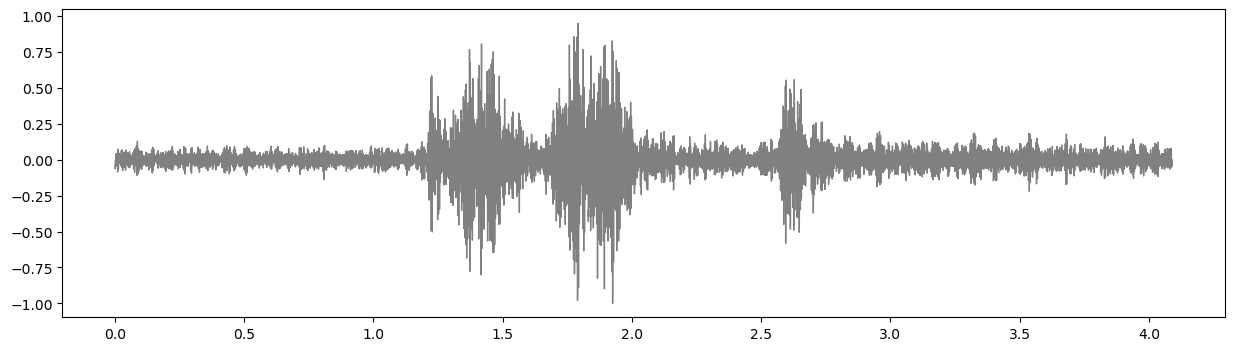

In [8]:
window_size = 45
smooth_y = np.convolve(y, np.ones(window_size) / window_size, mode = 'valid')
smooth_x = np.convolve(x, np.ones(window_size) / window_size, mode = 'valid')

plt.figure(figsize = (15, 4))
plt.plot(smooth_x, smooth_y / np.max(np.abs(smooth_y)), linewidth = 1, color = 'gray')
plt.show()

Before we start... What is the average amplitude of the resting state signal?

Obtained sampling rate: 5000 Hz
Average resting signal amplitude: 0.09005766319772794


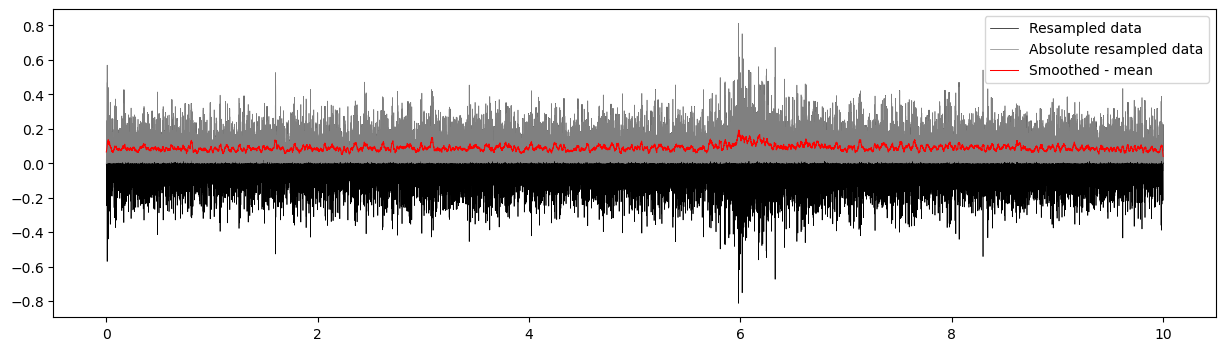

In [9]:
rest_y = data.get_data()[0]
rest_x = data.times

sfreq = 20000

# Resample the data
resample_factor = 4
rest_y = rest_y[::resample_factor]
rest_x = rest_x[::resample_factor]

print(f'Obtained sampling rate: {int(sfreq / resample_factor)} Hz')

# Smooth the signal by rolling average
window_size = 100
rest_smooth_y = np.convolve(np.abs(rest_y), np.ones(window_size) / window_size, mode = 'same')
mean_rest_y = np.mean(rest_smooth_y)
# rest_smooth_y = rest_smooth_y - mean_rest_y

print(f'Average resting signal amplitude: {mean_rest_y}')

plt.figure(figsize = (15, 4))

plt.plot(rest_x, rest_y, linewidth = 0.5, color = 'black', label = 'Resampled data')
plt.plot(rest_x, np.abs(rest_y), linewidth = 0.5, color = 'gray', label = 'Absolute resampled data')
plt.plot(rest_x, rest_smooth_y, linewidth = 0.75, color = 'red', label = 'Smoothed - mean')
plt.legend()
plt.show()

Obtained sampling rate: 5000 Hz


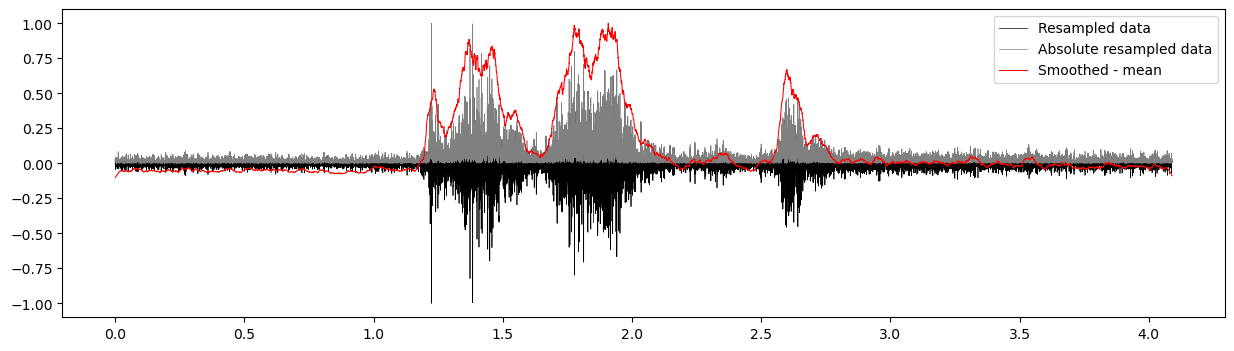

In [10]:
event_data = data.copy().pick(picks = [channel]).crop(tmin = start, tmax = end)
y = event_data.get_data()[0]
x = event_data.times

sfreq = 20000

# Resample the data
resample_factor = 4
y = y[::resample_factor]
x = x[::resample_factor]

print(f'Obtained sampling rate: {int(sfreq / resample_factor)} Hz')

# Smooth the signal by rolling average
window_size = 200
smooth_y = np.convolve(np.abs(y), np.ones(window_size) / window_size, mode = 'same')
smooth_y = smooth_y - 1.5 * mean_rest_y

plt.figure(figsize = (15, 4))

plt.plot(x, y / np.max(np.abs(y)), linewidth = 0.5, color = 'black', label = 'Resampled data')
plt.plot(x, np.abs(y) / np.max(np.abs(y)), linewidth = 0.5, color = 'gray', label = 'Absolute resampled data')
plt.plot(x, smooth_y / np.max(smooth_y), linewidth = 0.75, color = 'red', label = 'Smoothed - mean')
plt.legend()
plt.show()

In [11]:
signal_over_threshold = smooth_y >= 0
change_indices = np.where(np.diff(signal_over_threshold))[0]

movement_data = pd.DataFrame({
    'EventStart': np.insert(change_indices + 1, 0, 0),
    'EventEnd': np.append(change_indices, len(signal_over_threshold))
})

movement_data['Movement'] = signal_over_threshold[movement_data['EventStart']]

# Calculate the movement time in points and merge events
movement_data['EventLength'] = list(movement_data['EventEnd'] - movement_data['EventStart'])
movement_data = movement_data[movement_data['Movement'] == True]

In [12]:
n_est_movements = len(movement_data[movement_data['EventLength'] > 150])
print(f'Number of estimated movements: {n_est_movements}')
movement_data = movement_data[movement_data['EventLength'] > 150]
movement_data = movement_data.reset_index(drop = True)

Number of estimated movements: 12


In [13]:
print('Calculating the average signal amplitude during estimated movements')

for index, movement in movement_data.iterrows():
    start = movement['EventStart']
    end = movement['EventEnd']
    dt = smooth_y[start:end]
    movement_data.at[index, 'Amplitude'] = np.sqrt(np.mean(np.square(dt)))

movement_data = movement_data[movement_data['Amplitude'] > 0.25]
movement_data = movement_data.reset_index(drop = True)

n_est_movements = len(movement_data)
print(f'Number of estimated movements after amplitude filtering: {n_est_movements}')

Calculating the average signal amplitude during estimated movements
Number of estimated movements after amplitude filtering: 2


In [14]:
print(f'Number of estimated movements: {n_est_movements}')

Number of estimated movements: 2


In [15]:
true_movement = movement_data.iloc[1]

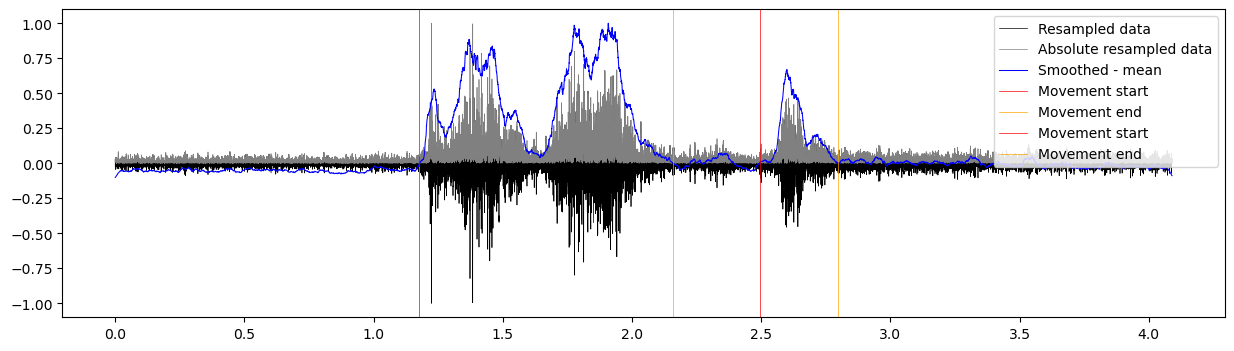

In [16]:
plt.figure(figsize = (15, 4))

plt.plot(x, y / np.max(np.abs(y)), linewidth = 0.5, color = 'black', label = 'Resampled data')
plt.plot(x, np.abs(y) / np.max(np.abs(y)), linewidth = 0.5, color = 'gray', label = 'Absolute resampled data')
plt.plot(x, smooth_y / np.max(smooth_y), linewidth = 0.75, color = 'blue', label = 'Smoothed - mean')

for index, true_movement in movement_data.iterrows():
    plt.axvline(x = x[true_movement['EventStart']], linewidth = 0.5, color = 'red', linestyle = '-', label = 'Movement start')
    plt.axvline(x = x[true_movement['EventEnd']], linewidth = 0.5, color = 'orange', linestyle = '-', label = 'Movement end')

plt.legend(loc = 'upper right')
plt.show()

In [47]:
data = read_pickle('output/spontaneous-movement/W1/C1/emg/filter.pkl')
events = read_pickle('output/spontaneous-movement/W1/C1/emg/final_movement.pkl')

In [48]:
events

,EventStart,EventEnd,Movement,EventLength,Amplitude,Start,End,Length,Channel
0,111424.0,130280.0,True,18856.0,0.769043,5.57120,6.51400,0.94280,2019_12_09t2I0_1
1,138440.0,143160.0,True,4720.0,0.533665,6.92200,7.15800,0.23600,2019_12_09t2I0_1
2,62761.0,77585.0,True,14824.0,1.078981,3.13805,3.87925,0.74120,2019_12_09t2I0_2
3,174425.0,191109.0,True,16684.0,0.625500,8.72125,9.55545,0.83420,2019_12_09t2I0_4
4,147638.0,161106.0,True,13468.0,0.603510,7.38190,8.05530,0.67340,2019_12_09t2I0_5
5,166126.0,174658.0,True,8532.0,0.526463,8.30630,8.73290,0.42660,2019_12_09t2I0_5
6,189751.0,193295.0,True,3544.0,0.543389,9.48755,9.66475,0.17720,2019_12_09t2I0_5
7,54355.0,70567.0,True,16212.0,0.551507,2.71775,3.52835,0.81060,2019_12_09t2I0_6
8,72423.0,79255.0,True,6832.0,0.688941,3.62115,3.96275,0.34160,2019_12_09t2I0_6
9,118233.0,125493.0,True,7260.0,1.049279,5.91165,6.27465,0.36300,2019_12_09t2I0_6


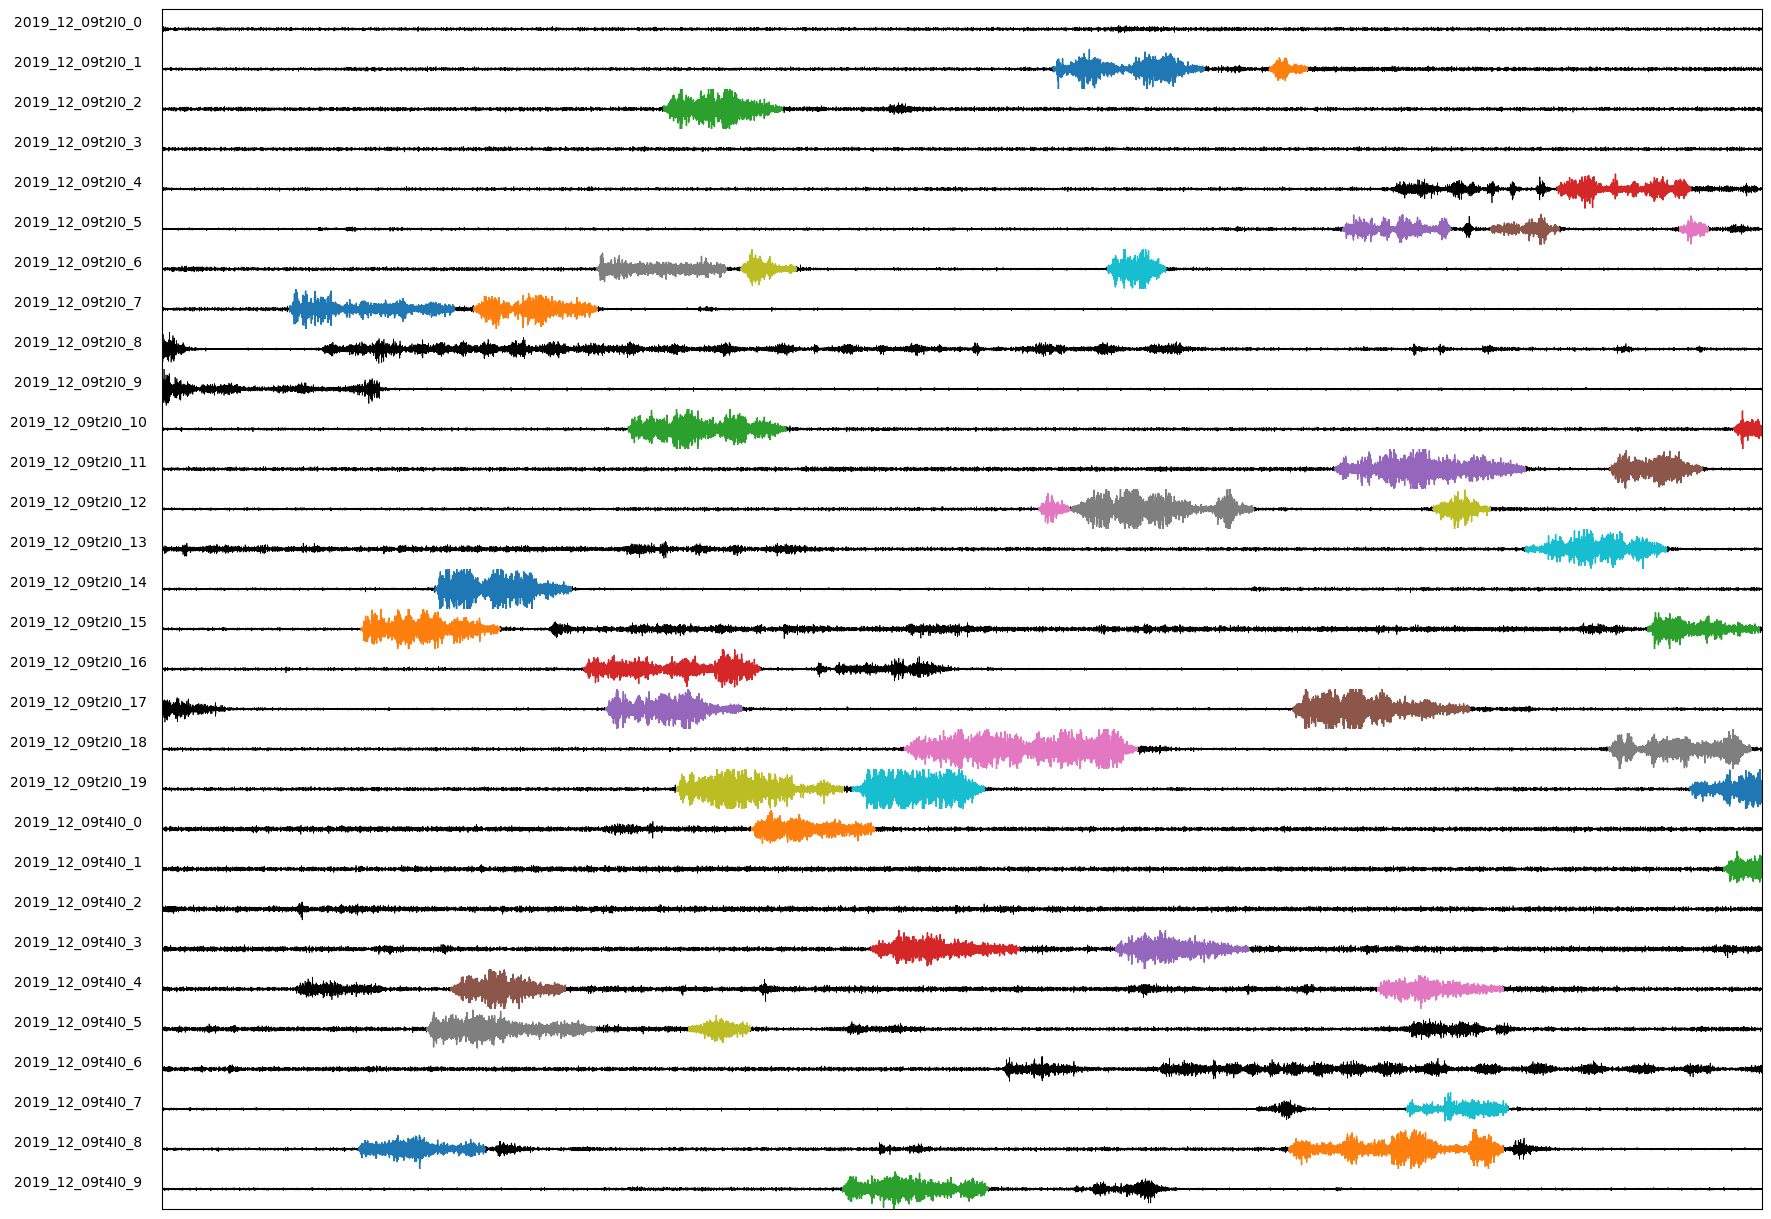

In [49]:
figure, axes = plt.subplots(nrows = len(data.ch_names), figsize = (20, 0.5 * len(data.ch_names)))
plt.subplots_adjust(
    left = 0.1,
    bottom = 0.1,
    right = 0.9,
    top = 0.9,
    wspace = 0,
    hspace = 0
)

x = data.times

color_list = list(mcolors.TABLEAU_COLORS.keys())

for i, channel in enumerate(data.ch_names):
    move_events = events[events['Channel'] == channel]

    y = data.get_data(picks = [i])[0]

    axes[i].plot(x, y, linewidth = 0.5, color = 'black')
    axes[i].set_ylim(-4, 4)
    axes[i].get_xaxis().set_ticks([])
    axes[i].get_yaxis().set_ticks([])
    axes[i].set_ylabel(channel, rotation = 0, labelpad = 60, loc = 'center')
    axes[i].set_xlim(0, 10)

    for index, row in move_events.iterrows():
        start = int(row['EventStart'])
        end = int(row['EventEnd'])
        color = color_list[index % len(color_list)]

        axes[i].plot(x[start:end], y[start:end], linewidth = 1, color = color)

    if i != 0:
        axes[i].spines['top'].set_visible(False)

    if i != len(data.ch_names) - 1:
        axes[i].spines['bottom'].set_visible(False)

plt.show()